# Project Title: Primary Stage Of Diabetes Prediction Using Machine Learning Approaches

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import sklearn as sk

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn import gaussian_process

In [10]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.svm import SVC

In [15]:
from sklearn.naive_bayes import BernoulliNB

In [16]:
from sklearn.ensemble import BaggingClassifier

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [18]:
dataset=pd.read_csv("diabetes.csv")

In [19]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [20]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
dataset.shape

(767, 9)

In [22]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [24]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

E:\Backup 22-03-2021\Desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

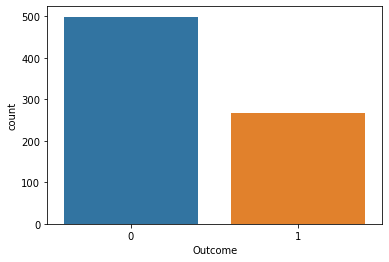

In [25]:
sns.countplot('Outcome',data=dataset)

E:\Backup 22-03-2021\Desktop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='Glucose', ylabel='Density'>,
 <AxesSubplot:xlabel='Glucose', ylabel='Density'>)

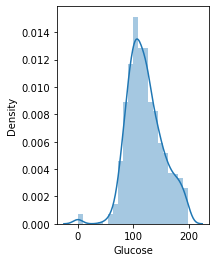

In [26]:
plt.figure(1)
plt.subplot(121),sns.distplot(dataset['Glucose'])

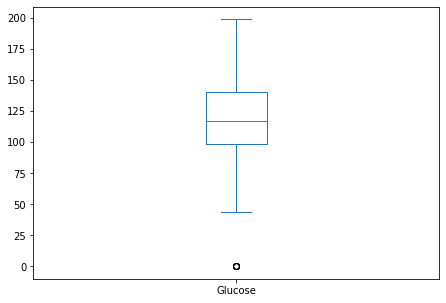

In [27]:
plt.subplot(122),dataset['Glucose'].plot.box(figsize=(16,5))
plt.show()

E:\Backup 22-03-2021\Desktop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>,
 <AxesSubplot:xlabel='Pregnancies', ylabel='Density'>)

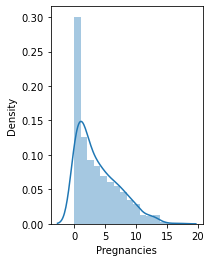

In [28]:
plt.figure(1)
plt.subplot(121),sns.distplot(dataset['Pregnancies'])

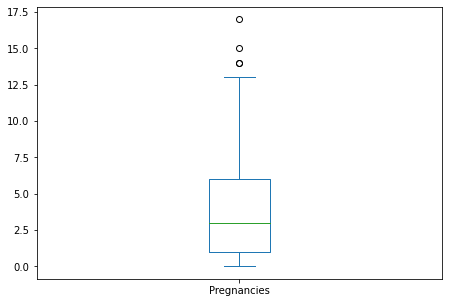

In [29]:
plt.subplot(122),dataset['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

E:\Backup 22-03-2021\Desktop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='BMI', ylabel='Density'>,
 <AxesSubplot:xlabel='BMI', ylabel='Density'>)

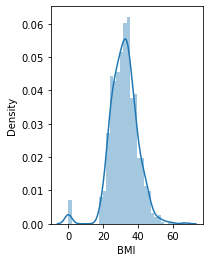

In [30]:
plt.figure(1)
plt.subplot(121),sns.distplot(dataset['BMI'])

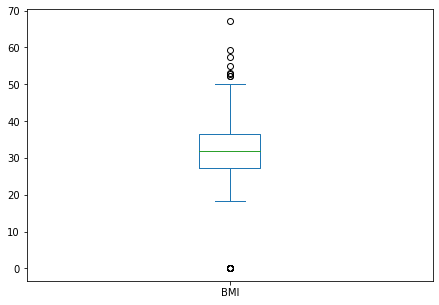

In [31]:
plt.subplot(122),dataset['BMI'].plot.box(figsize=(16,5))
plt.show()

E:\Backup 22-03-2021\Desktop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>,
 <AxesSubplot:xlabel='BloodPressure', ylabel='Density'>)

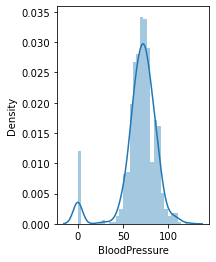

In [32]:
plt.figure(1)
plt.subplot(121),sns.distplot(dataset['BloodPressure'])

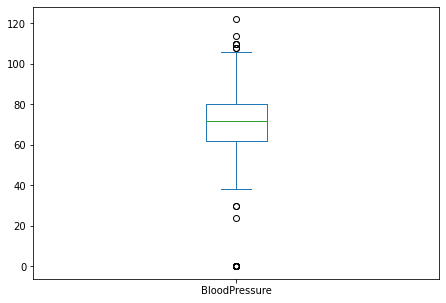

In [33]:
plt.subplot(122),dataset['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

E:\Backup 22-03-2021\Desktop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='Age', ylabel='Density'>,
 <AxesSubplot:xlabel='Age', ylabel='Density'>)

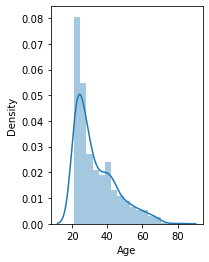

In [34]:
plt.figure(1)
plt.subplot(121),sns.distplot(dataset['Age'])

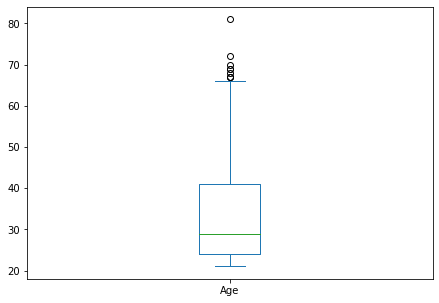

In [35]:
plt.subplot(122),dataset['Age'].plot.box(figsize=(16,5))
plt.show()

E:\Backup 22-03-2021\Desktop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='Insulin', ylabel='Density'>,
 <AxesSubplot:xlabel='Insulin', ylabel='Density'>)

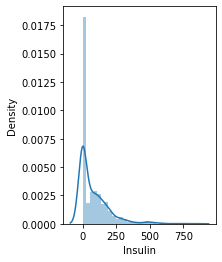

In [36]:
plt.figure(1)
plt.subplot(121),sns.distplot(dataset['Insulin'])

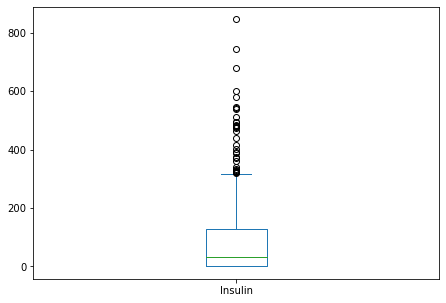

In [37]:
plt.subplot(122),dataset['Insulin'].plot.box(figsize=(16,5))
plt.show()

In [38]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

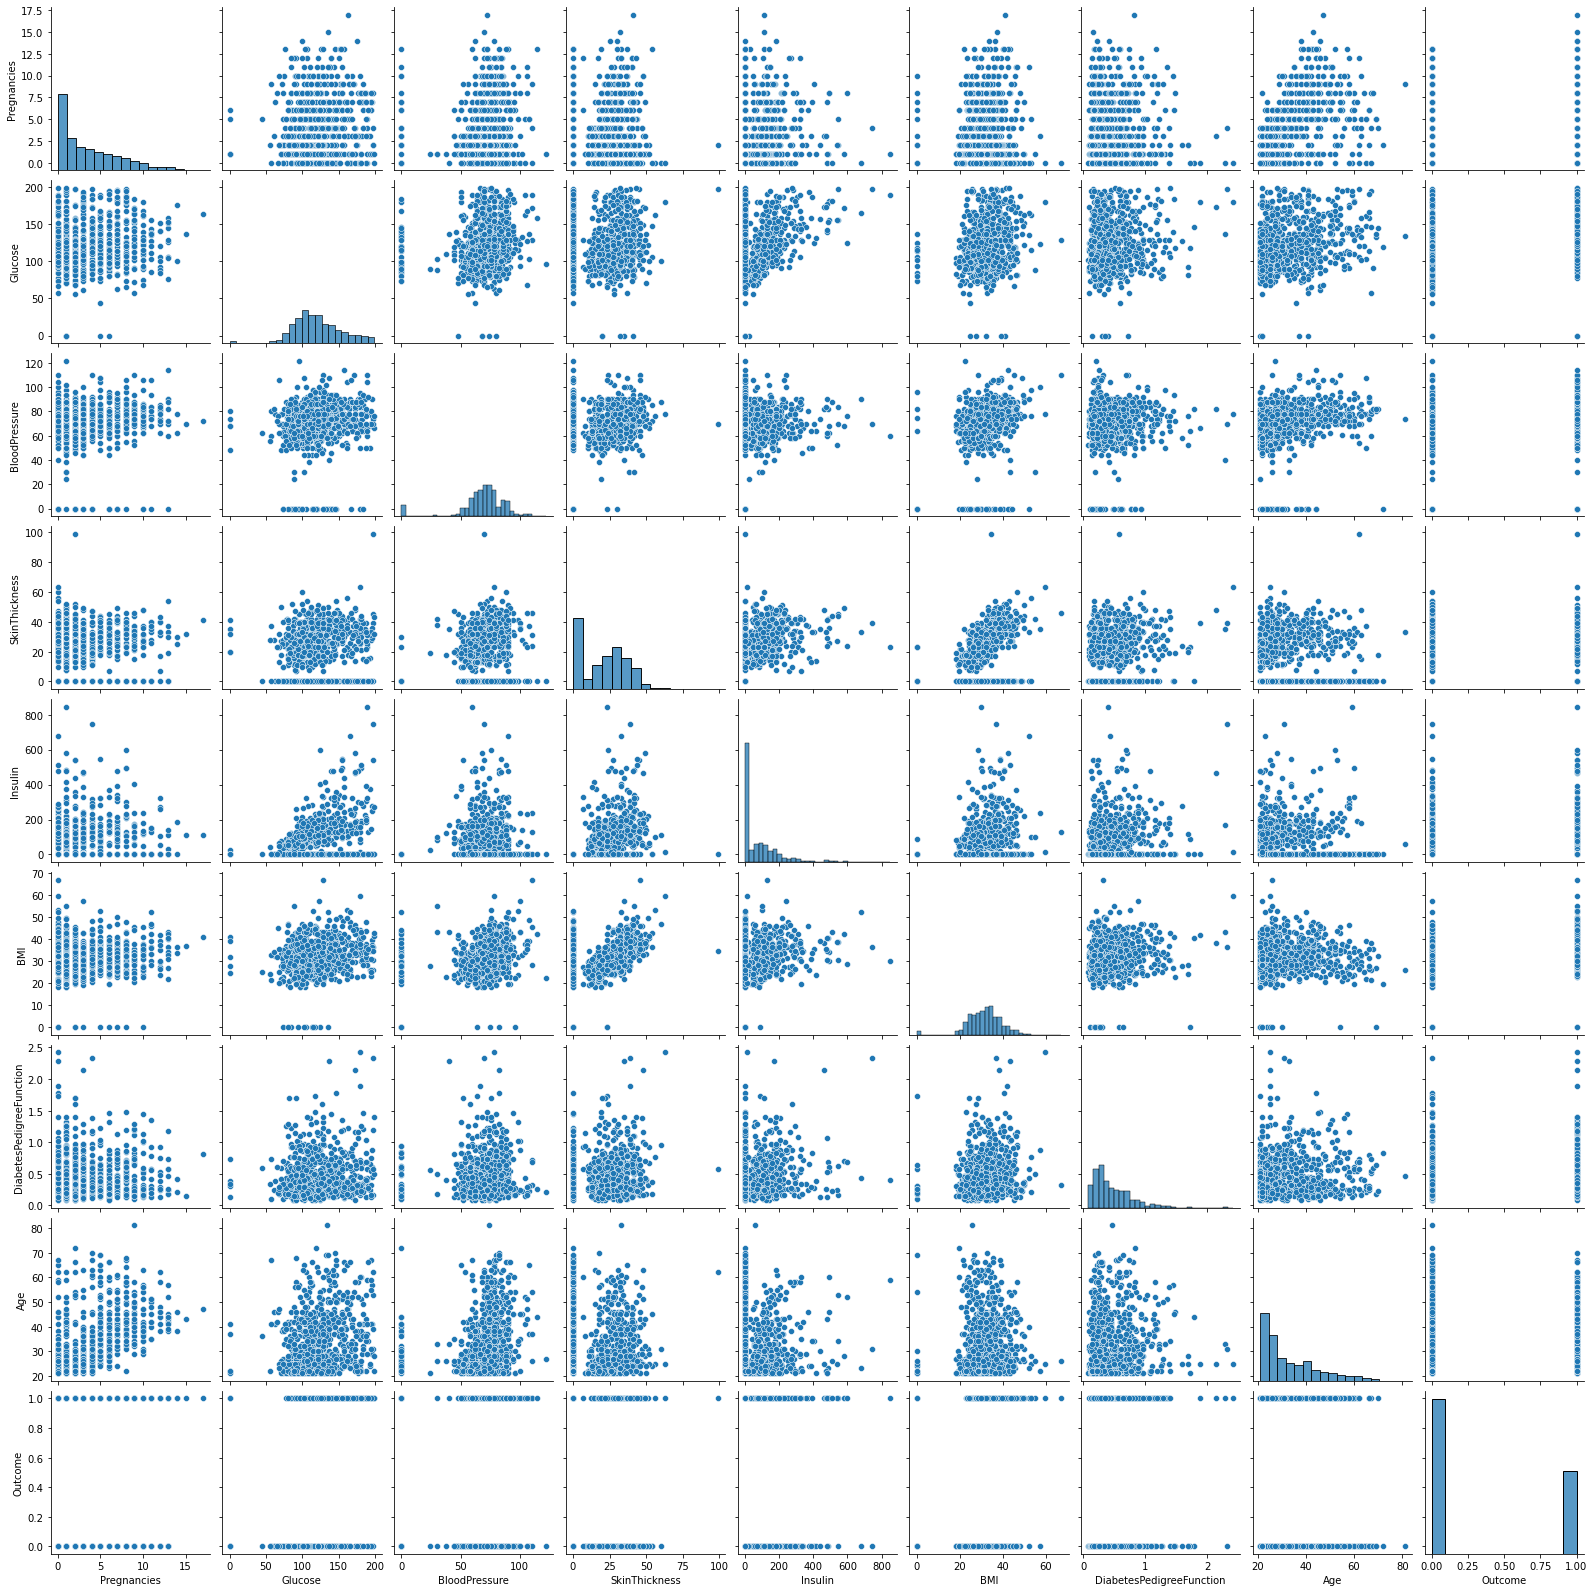

In [39]:
sns.pairplot(dataset)

In [40]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128621,0.141399,-0.081009,-0.074356,0.017469,-0.034065,0.543904,0.221272
Glucose,0.128621,1.000000,0.152718,0.058120,0.330836,0.220957,0.136886,0.262783,0.466143
BloodPressure,0.141399,0.152718,1.000000,0.207390,0.089003,0.281825,0.041300,0.239699,0.065135
SkinThickness,-0.081009,0.058120,0.207390,1.000000,0.437635,0.392867,0.184412,-0.113312,0.075426
Insulin,-0.074356,0.330836,0.089003,0.437635,1.000000,0.197744,0.184728,-0.042985,0.129973
BMI,0.017469,0.220957,0.281825,0.392867,0.197744,1.000000,0.140546,0.036031,0.292612
DiabetesPedigreeFunction,-0.034065,0.136886,0.041300,0.184412,0.184728,0.140546,1.000000,0.033044,0.173478
Age,0.543904,0.262783,0.239699,-0.113312,-0.042985,0.036031,0.033044,1.000000,0.237725
Outcome,0.221272,0.466143,0.065135,0.075426,0.129973,0.292612,0.173478,0.237725,1.000000


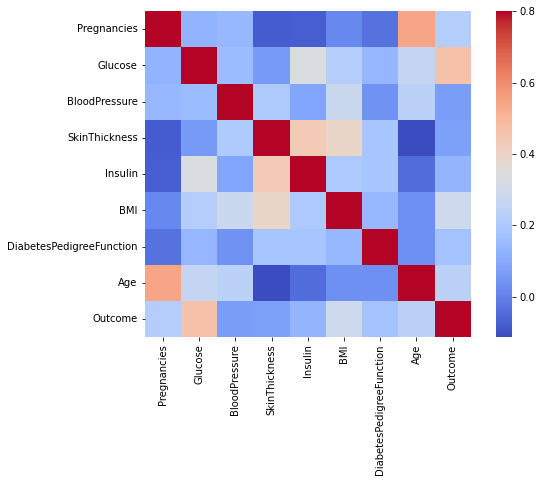

In [41]:
matrix=dataset.corr()
ax=plt.subplots(figsize=(9,6)),sns.heatmap(matrix,vmax=.8,square=True,cmap="coolwarm")

In [42]:
X=dataset.drop('Outcome',axis=1)

In [43]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30


In [44]:
y=dataset['Outcome']

In [45]:
y

0      1
1      0
2      1
3      0
4      1
      ..
762    0
763    0
764    0
765    0
766    1
Name: Outcome, Length: 767, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
fill_values= SimpleImputer(missing_values=np.nan, strategy='mean')

In [50]:
X_train=fill_values.fit_transform(X_train)

In [51]:
X_train

array([[  3.   , 158.   ,  64.   , ...,  31.2  ,   0.295,  24.   ],
       [  0.   , 146.   ,  82.   , ...,  40.5  ,   1.781,  44.   ],
       [  5.   , 109.   ,  62.   , ...,  35.8  ,   0.514,  25.   ],
       ...,
       [  1.   , 119.   ,  44.   , ...,  35.5  ,   0.28 ,  25.   ],
       [  5.   , 115.   ,  76.   , ...,  31.2  ,   0.343,  44.   ],
       [  9.   , 130.   ,  70.   , ...,  34.2  ,   0.652,  45.   ]])

In [52]:
X_test=fill_values.fit_transform(X_test)

In [53]:
X_test

array([[  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   ,  81.   ,  74.   , ...,  46.3  ,   1.096,  32.   ],
       [  7.   , 106.   ,  92.   , ...,  22.7  ,   0.235,  48.   ],
       ...,
       [  6.   , 190.   ,  92.   , ...,  35.5  ,   0.278,  66.   ],
       [  0.   , 105.   ,  68.   , ...,  20.   ,   0.236,  22.   ],
       [  7.   , 109.   ,  80.   , ...,  35.9  ,   1.127,  43.   ]])

# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model=LogisticRegression()

In [57]:
grid_vals={'penalty':['11','12'],'C':[0.001,0.01,0.1,1]}

In [58]:
grid_lr=GridSearchCV(estimator=model,param_grid=grid_vals,scoring='accuracy',cv=6,refit=True,return_train_score=True)

# LogisticRegression 

In [59]:
model=LogisticRegression()

In [60]:
model.fit(X_train,y_train)

E:\Backup 22-03-2021\Desktop\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
train_acc=model.score(X_train,y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 76.11940298507463


In [62]:
test_acc=model.score(X_test,y_test)
print("The Accuracy for Test Set is{}".format(test_acc*100))

The Accuracy for Test Set is81.38528138528139


# Random Forests

In [63]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [64]:
predictions=rfc.predict(X_test)

In [65]:
from sklearn import metrics

In [66]:
print("Accuracy_score=", format(metrics.accuracy_score(y_test,predictions)))

Accuracy_score= 0.8051948051948052


In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[135  25]
 [ 20  51]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       160
           1       0.67      0.72      0.69        71

    accuracy                           0.81       231
   macro avg       0.77      0.78      0.78       231
weighted avg       0.81      0.81      0.81       231



In [69]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
predictions=dtree.predict(X_test)

In [71]:
from sklearn import metrics

In [72]:
print("Accuracy Score=",format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score= 0.7445887445887446


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[123  37]
 [ 22  49]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       160
           1       0.57      0.69      0.62        71

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.76      0.74      0.75       231



# ADABOOST Classifier

In [75]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

In [76]:
model = abc.fit(X_train, y_train)

In [77]:
y_pred = model.predict(X_test)

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7965367965367965


# SVM

In [79]:
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [80]:
svc_pred=svc_model.predict(X_test)

In [81]:
from sklearn import metrics

In [82]:
print("Accuracy Score =",format(metrics.accuracy_score(y_test,svc_pred)))

Accuracy Score = 0.8138528138528138


In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(confusion_matrix(y_test,svc_pred))

[[148  12]
 [ 31  40]]


In [85]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       160
           1       0.77      0.56      0.65        71

    accuracy                           0.81       231
   macro avg       0.80      0.74      0.76       231
weighted avg       0.81      0.81      0.80       231



# Naive Bayes 

In [86]:
classifer = BernoulliNB()

In [87]:
classifer.fit(X_train, y_train)

BernoulliNB()

In [88]:
y_pred = classifer.predict(X_test)

In [89]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
print(accuracy_score(y_pred, y_test))

0.6926406926406926


In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
cm = confusion_matrix(y_test, y_pred)

In [94]:
from sklearn.metrics import classification_report

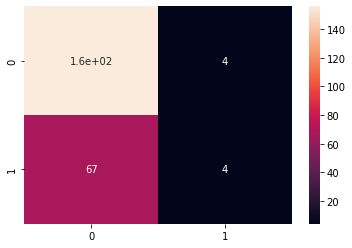

In [95]:
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       160
           1       0.50      0.06      0.10        71

    accuracy                           0.69       231
   macro avg       0.60      0.52      0.46       231
weighted avg       0.64      0.69      0.60       231



# KNeighbors

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)

In [98]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
y_pred = knn.predict(X_test)

In [100]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7445887445887446


# Model Selection

In [101]:
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, X, y, cv=10, scoring ='accuracy').mean())

0.7184210526315791
